In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
a = 0.5
dx = 1
threshold = 1e-6

def f(x,c):
    return 1-np.e**(-c*x)

a_list = [a]
print(a_list)
while dx > threshold:
    a_list.append(f(a_list[-1],2))
    dx = np.abs(a_list[-1]-a_list[-2])


[0.5]


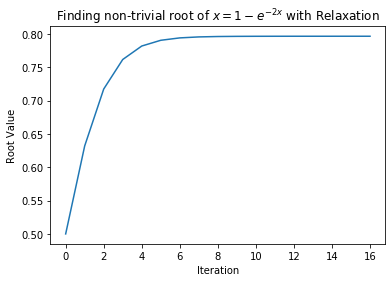

In [25]:
plt.plot(a_list)
plt.title(r"Finding non-trivial root of $x=1-e^{-2x}$ with Relaxation")
plt.xlabel("Iteration")
plt.ylabel("Root Value")
plt.savefig("Q3_610a.pdf")

In [20]:
c_list = np.arange(0,3,0.01)
r_list = []

for c in c_list:
    a_list = [a]
    dx = 1
    while dx > threshold:
        a_list.append(f(a_list[-1],c))
        dx = np.abs(a_list[-1]-a_list[-2])
    r_list.append(a_list[-1])

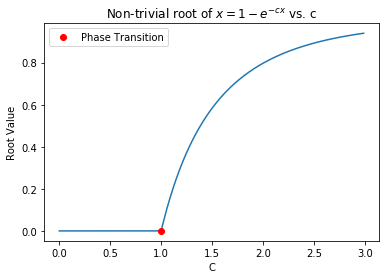

In [33]:
plt.plot(c_list, r_list)
plt.plot(1,0,"o",color="red",label="Phase Transition")
plt.title(r"Non-trivial root of $x=1-e^{-cx}$ vs. c")
plt.xlabel("C")
plt.ylabel("Root Value")
plt.legend()
plt.savefig("Q3_610b.pdf")

# 6.11 b,c,d

In [110]:
#b
a = 0.5
dx = 1
threshold = 1e-6

def f(x,c):
    return 1-np.e**(-c*x)

a_list = [a]

while dx > threshold:
    a_list.append(f(a_list[-1],2))
    dx = np.abs(a_list[-1]-a_list[-2])
print(len(a_list)-1) #16 iterations, with starting value a=0.5

16


In [113]:
#c

#Description: This code analyzes the number of iterations required to get the nontrivial root of 
#x=1-e^(-2x) using over-relaxation. It outputs a plot showing a 
#using code from part (b) (which is originally from the lab notes)

threshold = 1e-6
w_list=np.arange(0.5,1,0.05) #testing with a range of w
i_list = [] #number of iterations list

#defining the function on the RHS
def f(x,c):
    return 1-np.e**(-c*x)

#running a for loop for each w-value, and storing the resulting number of iteration in i_list
for w in w_list:
    a = 0.5
    dx = 1
    a_list = [a]
    while dx > threshold: #run until desired accuracy is achieved
        a_list.append((1+w)*f(a_list[-1],2)-w*a_list[-1]) #overelaxation formula
        dx = np.abs(a_list[-1]-a_list[-2]) 
    i_list.append(len(a_list)-1) #subtract 1 since before any iterations, len(a_list) = len([a]) = 1

#Printing the number of iterations required for each w value in w_list:
for i in range(len(w_list)):
    print("{0} iterations were required for the overelaxation parameter {1} to \
achieve an accuracy of 10^-6 for the nontrivial root".format(i_list[i],w_list[i]))

8 iterations were required for the overelaxation parameter 0.5 to achieve an accuracy of 10^-6 for the nontrivial root
7 iterations were required for the overelaxation parameter 0.55 to achieve an accuracy of 10^-6 for the nontrivial root
7 iterations were required for the overelaxation parameter 0.6000000000000001 to achieve an accuracy of 10^-6 for the nontrivial root
6 iterations were required for the overelaxation parameter 0.6500000000000001 to achieve an accuracy of 10^-6 for the nontrivial root
5 iterations were required for the overelaxation parameter 0.7000000000000002 to achieve an accuracy of 10^-6 for the nontrivial root
6 iterations were required for the overelaxation parameter 0.7500000000000002 to achieve an accuracy of 10^-6 for the nontrivial root
6 iterations were required for the overelaxation parameter 0.8000000000000003 to achieve an accuracy of 10^-6 for the nontrivial root
7 iterations were required for the overelaxation parameter 0.8500000000000003 to achieve an

# (d)
Yes, having an overrelaxation parameter w<0 is better than w=0 (ordinary relaxation) when the relaxation method is oscillating around the desired value, like in the case of x = (1/4) * e^(1-x^2) with starting value a=0.9 (the intuition for this is equation 6.72 from Newman). Having w>0 allows to for a greater controlled step in x, and w<0 allows for a lower controlled step in x, so it reduces the amount of overshooting across the desired value. This means that when x is oscillating around the final solution, w<0 decreases these oscillations at a faster rate than w=0, allowing one to obtain the final solution with a certain accuracy with a lower number of iterations.

In [87]:
a = 0.9
dx = 1
a_list = [a]
threshold = 1e-6
w = -0.5

#defining the function on the RHS
def f(x):
    return (1/4)*np.e**(1-x**2)



while dx > threshold and len(a_list)<50:
    a_list.append((1+w)*f(a_list[-1])-w*a_list[-1]) #overelaxation formula
    dx = np.abs(a_list[-1]-a_list[-2]) 

print(a_list)

[0.9, 0.6011561997071564, 0.5373092147728075, 0.5232339497002512, 0.5200250368685313, 0.5192871097799521, 0.5191170696767977, 0.5190778690005784, 0.5190688307806317, 0.5190667468506351, 0.5190662663589756]


# 6.11 b,c

In [88]:
#b

#Using binary search:

In [128]:
#BINARY SEARCH
#define function to be used in binary search
def f(x):
    return 5*np.e**(-x) + x - 5

#initial end points
a = 1 #here, f(a) < 0
b = 10 #here, f(b) > 0

dist = b-c #distance between endpoints

x1_list = [a] #list of left sided endpoints
x2_list = [b] #list of right sided endpoints

threshold = 1e-6 #want to have accuracy of at least 10^-6

iterations = 0

while dist>threshold:#run until desired accuracy is achieved
    iterations += 1
    dist = x2_list[-1] - x1_list[-1] #distance between current endpoints
    midpoint = (x1_list[-1] + x2_list[-1])/2 #get midpoint at current endpoints
    mid_value = f(midpoint)
    if(mid_value < 0): #append to left sided endpoint list if f(midpoint) <0
        x1_list.append(midpoint) 
    else: #append to right sided endpoint list if f(midpoint) > 0
        x2_list.append(midpoint) 
print("Achieving an accuracy of 10^-6 with binary search required {0} iterations, and the \
endpoints are: ({1},{2}).".format(iterations, x1_list[-1], x2_list[-1]))

Achieving an accuracy of 10^-6 with binary search required 25 iterations, and the endpoints are: (4.965114146471024,4.965114414691925).


In [129]:
#NEWTON'S METHOD
a = 1
dx = 1
threshold = 1e-6

#define function to be used in Newton's method
def f(x):
    return 5*np.e**(-x) + x - 5

def d_f(x): #define the derivative of f(x) 
    return -5 * np.e**(-x) + 1
    
a_list = [a]
while dx > threshold:#run until desired accuracy is achieved
    x_new = a_list[-1] - f(a_list[-1])/d_f(a_list[-1]) #newton method equation to get next x
    a_list.append(x_new)
    dx = np.abs(a_list[-1]-a_list[-2])
    
print("Achieving an accuracy of 10^-6 with Newton's method required {0} iterations when the \
starting point was: {1}.".format(len(a_list)-1, a))

#try it for starting point a=10 as well:
a = 10
dx = 1
threshold = 1e-6

def d_f(x): #define the derivative of f(x) 
    return -5 * np.e**(-x) + 1
    
a_list = [a]
while dx > threshold:#run until desired accuracy is achieved
    x_new = a_list[-1] - f(a_list[-1])/d_f(a_list[-1]) #newton method equation to get next x
    a_list.append(x_new)
    dx = np.abs(a_list[-1]-a_list[-2])
    
print("Achieving an accuracy of 10^-6 with Newton's method required {0} iterations when the \
starting point was: {1}.".format(len(a_list)-1, a))


Achieving an accuracy of 10^-6 with Newton's method required 7 iterations when the starting point was: 1.
Achieving an accuracy of 10^-6 with Newton's method required 4 iterations when the starting point was: 10.


In [126]:
a = 1
dx = 1
threshold = 1e-6

#define function for relaxation, has to be different from the functions above since now we
#solve x = f(x) instead of f(x) = 0
def f(x):
    return - 5*np.e**(-x) + 5

a_list = [a]
while dx > threshold:#run until desired accuracy is achieved
    a_list.append(f(a_list[-1]))
    dx = np.abs(a_list[-1]-a_list[-2])
    
print("Achieving an accuracy of 10^-6 with relaxation required {0} iterations when the \
starting point was: {1}.".format(len(a_list)-1, a))

#try it for starting point a=10 as well:
a = 10
dx = 1
threshold = 1e-6

#define function for relaxation, has to be different from the function for binary search since now we 
#solve x = f(x) instead of f(x) = 0

a_list = [a]
while dx > threshold:#run until desired accuracy is achieved
    a_list.append(f(a_list[-1]))
    dx = np.abs(a_list[-1]-a_list[-2])
    
print("Achieving an accuracy of 10^-6 with relaxation required {0} iterations when the \
starting point was: {1}.".format(len(a_list)-1, a))

Achieving an accuracy of 10^-6 with relaxation required 7 iterations when the starting point was: 1.
Achieving an accuracy of 10^-6 with relaxation required 6 iterations when the starting point was: 10.


In [132]:
#c

h = 6.63 * 10**(-34) #Plank constant, units of J*s
c = 3*10**8 #speed of light, units of m/s
k_b = 1.38*10**(-23) #Boltzmann constant, units of J/K
lmbda = 502*10**(-9) #wavelength of Sun's emitted radiation, units of m
x = x1_list[-1] #final left endpoint from binary search method, dimensionless

T = h*c/(lmbda*k_b*x)
print("The temperature at the surface of the Sun is approximately {0} K".format(T))

The temperature at the surface of the Sun is approximately 5782.594546990246 K
